In [27]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 

In [6]:
xcount = 250
xbox = 100
ybox = 100
yvector = ['#', '1', '2', '4', '8', '16', 'b', 'k', 'o', 'p', 'p4', 'p8', 'p16', 'pnt', 't', 't2', 't3', 't4', 't6', 't8', 't22', 't24', 't34', 't44', 't68', 'tc', 'tnc']
ycount = len(yvector)

In [13]:
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        plt.axis('off')
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [24]:
# knn = KNeighborsClassifier(n_neighbors=7)
# gray = cv2.imread('dataset.png', cv2.IMREAD_GRAYSCALE)
# cells = [np.hsplit(row, xcount) for row in np.vsplit(gray, ycount)]
# x = np.array(cells)
# train = x[:, :xcount].reshape(-1, xbox*ybox).astype(np.float32)
# k = np.arange(ycount)
# train_labels = np.repeat(k, xcount)[:, np.newaxis]
# knn.fit(train, train_labels)

knn = cv2.ml.KNearest_create()
gray = cv2.imread('dataset.png', cv2.IMREAD_GRAYSCALE)
cells = [np.hsplit(row, xcount) for row in np.vsplit(gray, ycount)]
x = np.array(cells)
train = x[:, :xcount].reshape(-1, xbox*ybox).astype(np.float32)
k = np.arange(ycount)
train_labels = np.repeat(k, xcount)[:, np.newaxis]
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

True

k 110332424.0


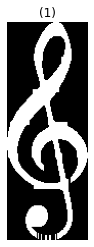

4 19686252.0


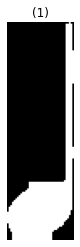

4 31785442.0


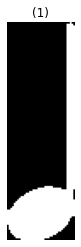

4 35523736.0


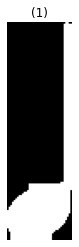

t 101950700.0


t 63505190.0


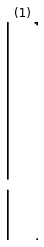

4 31382332.0


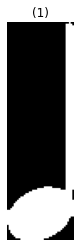

4 37054544.0


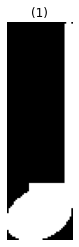

4 32101424.0


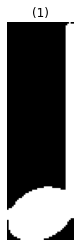

4 30113990.0


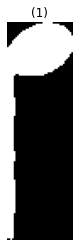

p 148743820.0


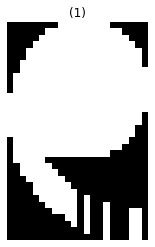

In [30]:
for i in range(11):
    img = cv2.imread(f'prims_without_staff/prim{i}.png', cv2.IMREAD_GRAYSCALE)
    box = cv2.resize(img, (100, 100))
    test = box.reshape(-1, xbox*ybox).astype(np.float32)
    ret, res, neighbours, distance = knn.findNearest(test, 5) 
    print(yvector[int(ret)], distance[0][0])
    show_images([img])